<a href="https://colab.research.google.com/github/vishnu4510/datascience/blob/main/Daily_task_Missing_value_Outlier_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df= pd.read_csv('/content/churn-data-v2.csv')
df.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low


In [48]:
df.shape

(14999, 10)

In [49]:
df.describe()

,satisfaction,evaluation,average_montly_hours
count,14990.000000,14936.000000,14973.000000
mean,0.612817,716.085297,201.050424
std,0.248704,171.529563,49.986445
min,0.090000,360.000000,96.000000
25%,0.440000,560.000000,156.000000
50%,0.640000,720.000000,200.000000
75%,0.820000,870.000000,245.000000
max,1.000000,1000.000000,310.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14990 non-null  float64
 1   evaluation            14936 non-null  float64
 2   number_of_projects    14955 non-null  object 
 3   average_montly_hours  14973 non-null  float64
 4   time_spend_company    14999 non-null  object 
 5   work_accident         14999 non-null  object 
 6   churn                 14999 non-null  object 
 7   promotion             14999 non-null  object 
 8   department            14958 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [51]:
df.isna().sum()

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
time_spend_company,0
work_accident,0
churn,0
promotion,0
department,41
salary,0


In [52]:
df.columns


Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [53]:
null_columns=df[['satisfaction', 'evaluation', 'number_of_projects','average_montly_hours','department']]
null_columns


,satisfaction,evaluation,number_of_projects,average_montly_hours,department
0,0.38,530.0,two,157.0,sales
1,0.80,860.0,five,262.0,sales
2,0.11,880.0,seven,272.0,sales
3,0.72,870.0,five,223.0,sales
4,0.37,520.0,two,159.0,sales
...,...,...,...,...,...
14994,0.40,570.0,two,151.0,support
14995,0.37,480.0,two,160.0,support
14996,0.37,530.0,two,143.0,support
14997,0.11,960.0,six,280.0,support


In [54]:
null_columns.isna().sum()

,0
satisfaction,9
evaluation,63
number_of_projects,44
average_montly_hours,26
department,41


In [55]:
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include='number').columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])
df

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,530.0,two,157.0,3+,no,yes,no,sales,low
1,0.80,860.0,five,262.0,6+,no,yes,no,sales,medium
2,0.11,880.0,seven,272.0,4+,no,yes,no,sales,medium
3,0.72,870.0,five,223.0,5+,no,yes,no,sales,low
4,0.37,520.0,two,159.0,3+,no,yes,no,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,570.0,two,151.0,3+,no,yes,no,support,low
14995,0.37,480.0,two,160.0,3+,no,yes,no,support,low
14996,0.37,530.0,two,143.0,3+,no,yes,no,support,low
14997,0.11,960.0,six,280.0,4+,no,yes,no,support,low


In [56]:
null_columns=df[['satisfaction', 'evaluation', 'number_of_projects','average_montly_hours','department']]
null_columns.isna().sum()

,0
satisfaction,0
evaluation,0
number_of_projects,44
average_montly_hours,0
department,41


In [57]:


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['number_of_projects'] = imputer.fit_transform(df[['number_of_projects']]).ravel()

In [58]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['department'] = imputer.fit_transform(df[['department']]).ravel()

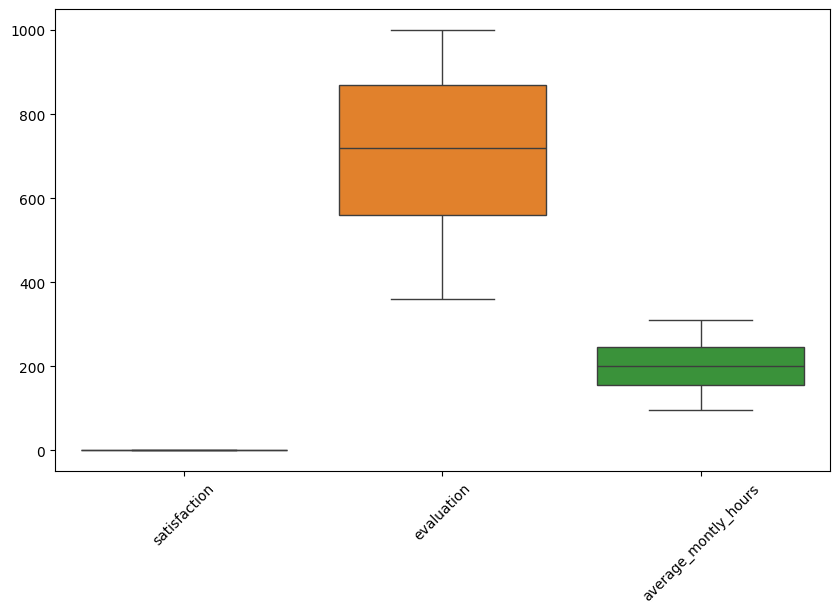

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [59]:
# there are no outliers